<a href="https://colab.research.google.com/github/lmcanavals/experiments/blob/main/Analisis_estad%C3%ADstico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install wquantiles

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
URL="https://raw.githubusercontent.com/lmcanavals/experiments/main/data/state.csv"

In [ ]:
state = pd.read_csv(URL)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [ ]:
state['Population'].mean()

6162876.3

In [ ]:
trim_mean(state['Population'], 0.1)

4783697.125

In [ ]:
state['Population'].median()

4436369.5

In [ ]:
state['Murder.Rate'].mean()

4.066

In [ ]:
np.average(state['Murder.Rate'], weights=state['Population'])

4.445833981123393

In [ ]:
wquantiles.median(state['Murder.Rate'], weights=state['Population'])

4.4

# Estimaciones de Variabilidad

In [ ]:
state['Population'].std()

6848235.347401142

Rango Intercuartil

In [ ]:
state['Population'].quantile(0.75) - state['Population'].quantile(0.25)

4847308.0

Desviación absoluta media

In [ ]:
robust.scale.mad(state['Population'])

3849876.1459979336

In [ ]:
abs(state['Population'] - state['Population'].median()).median() / 0.6744897501960817

3849876.1459979336

# Percentiles y Boxplots

In [ ]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [ ]:
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))
df.index = [f"{p*100}%" for p in percentages]
df.transpose()

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


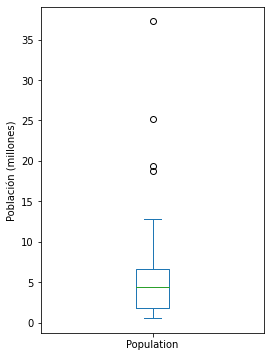

In [ ]:
ax = (state['Population']/1_000_000).plot.box(figsize=(4, 6))
ax.set_ylabel('Población (millones)')

plt.show()

# Tablas de frecuencia, Histogramas

In [ ]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

In [ ]:
binnedPopulation.name = "binnedPopulation"
df = pd.concat([state, binnedPopulation], axis=1)
df = df.sort_values(by="Population")

groups = []
for group, subset in df.groupby(by="binnedPopulation"):
  groups.append({
      "BinRange": group,
      "Count": len(subset),
      "states": ",".join(subset.Abbreviation)
  })
pd.DataFrame(groups)

,BinRange,Count,states
0,"(526935.67, 4232659.0]",24,"WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N..."
1,"(4232659.0, 7901692.0]",14,"KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA"
2,"(7901692.0, 11570725.0]",6,"VA,NJ,NC,GA,MI,OH"
3,"(11570725.0, 15239758.0]",2,"PA,IL"
4,"(15239758.0, 18908791.0]",1,FL
5,"(18908791.0, 22577824.0]",1,NY
6,"(22577824.0, 26246857.0]",1,TX
7,"(26246857.0, 29915890.0]",0,
8,"(29915890.0, 33584923.0]",0,
9,"(33584923.0, 37253956.0]",1,CA


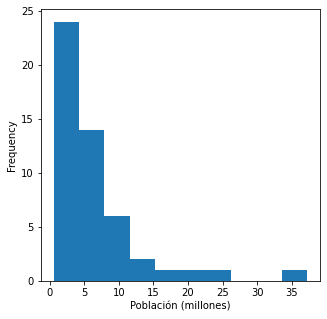

In [ ]:
ax = (state['Population']/1_000_000).plot.hist(figsize=(5, 5))
ax.set_xlabel("Población (millones)")

plt.show()

Estimación de densidad

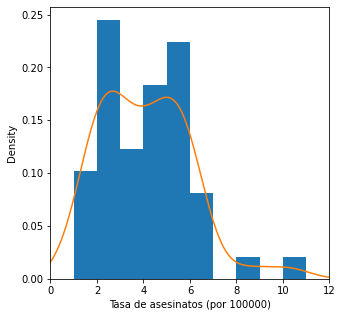

In [ ]:
ax = state["Murder.Rate"].plot.hist(density=True, xlim=[0, 12], bins=range(1, 12), figsize=(5, 5))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel("Tasa de asesinatos (por 100000)")

plt.show()

# Explorando data categórica

In [ ]:
URL2 = "https://raw.githubusercontent.com/lmcanavals/experiments/main/data/dfw_airline.csv"
dfw = pd.read_csv(URL2)
dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


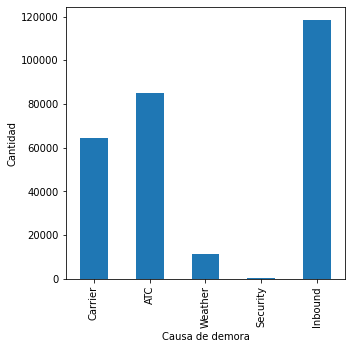

In [ ]:
ax = dfw.transpose().plot.bar(figsize=(5, 5), legend=False)
ax.set_xlabel("Causa de demora")
ax.set_ylabel("Cantidad")

plt.show()

# Correlación

In [ ]:
URL3 = "https://raw.githubusercontent.com/lmcanavals/experiments/main/data/sp500_sectors.csv"
URL4 = "https://raw.githubusercontent.com/lmcanavals/experiments/main/data/sp500_data.csv.gz"

sp500_sym = pd.read_csv(URL3)
sp500_px = pd.read_csv(URL4, index_col=0)

In [ ]:
sp500_sym.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


In [ ]:
sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [ ]:
telecomSymbols = sp500_sym[sp500_sym['sector'] == 'telecommunications_services']['symbol']

telecom = sp500_px.loc[sp500_px.index >= "2012-07-01", telecomSymbols]
telecom.corr()
telecom

,T,CTL,FTR,VZ,LVLT
2012-07-02,0.422496,0.140847,0.070879,0.554180,-0.519998
2012-07-03,-0.177448,0.066280,0.070879,-0.025976,-0.049999
2012-07-05,-0.160548,-0.132563,0.055128,-0.051956,-0.180000
2012-07-06,0.342205,0.132563,0.007875,0.140106,-0.359999
2012-07-09,0.136883,0.124279,-0.023626,0.253943,0.180000
...,...,...,...,...,...
2015-06-25,0.049342,-1.600000,-0.040000,-0.187790,-0.330002
2015-06-26,-0.256586,0.039999,-0.070000,0.029650,-0.739998
2015-06-29,-0.098685,-0.559999,-0.060000,-0.504063,-1.360000
2015-06-30,-0.503298,-0.420000,-0.070000,-0.523829,0.199997


In [ ]:
etfs = sp500_px.loc[sp500_px.index > '2012-07-01', 
                    sp500_sym[sp500_sym['sector'] == 'etf']['symbol']]
etfs.head()

,XLI,QQQ,SPY,DIA,GLD,VXX,USO,IWM,XLE,XLY,XLU,XLB,XTL,XLV,XLP,XLF,XLK
2012-07-02,-0.376098,0.096313,0.028223,-0.242796,0.419998,-10.40,0.000000,0.534641,0.028186,0.095759,0.098311,-0.093713,0.019076,-0.009529,0.313499,0.018999,0.075668
2012-07-03,0.376099,0.481576,0.874936,0.728405,0.490006,-3.52,0.250000,0.926067,0.995942,0.000000,-0.044686,0.337373,0.000000,0.000000,0.129087,0.104492,0.236462
2012-07-05,0.150440,0.096313,-0.103487,0.149420,0.239991,6.56,-0.070000,-0.171848,-0.460387,0.306431,-0.151938,0.103086,0.019072,-0.142955,-0.073766,-0.142490,0.066211
2012-07-06,-0.141040,-0.491201,0.018819,-0.205449,-0.519989,-8.80,-0.180000,-0.229128,0.206706,0.153214,0.080437,0.018744,-0.429213,-0.095304,0.119865,0.066495,-0.227003
2012-07-09,0.244465,-0.048160,-0.056445,-0.168094,0.429992,-0.48,0.459999,-0.190939,-0.234892,-0.201098,-0.035751,-0.168687,0.000000,0.352630,-0.064548,0.018999,0.009457


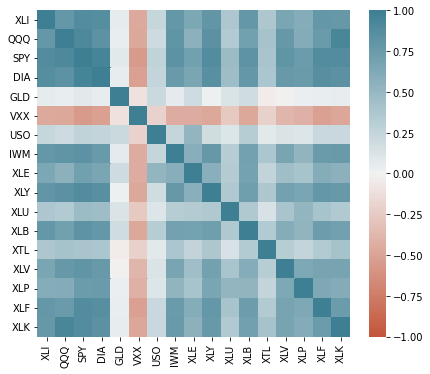

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), ax=ax)

plt.show()

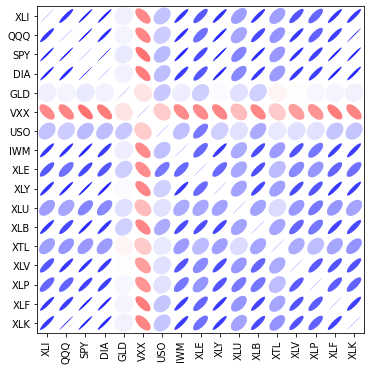

In [ ]:
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    ''' https://stackoverflow.com/a/34558488 '''
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return ec

m = plot_corr_ellipses(etfs.corr(), figsize=(7, 6), cmap='bwr_r')
cb = fig.colorbar(m)
cb.set_label('Correlation coefficient')

plt.show()

# Scatterplots

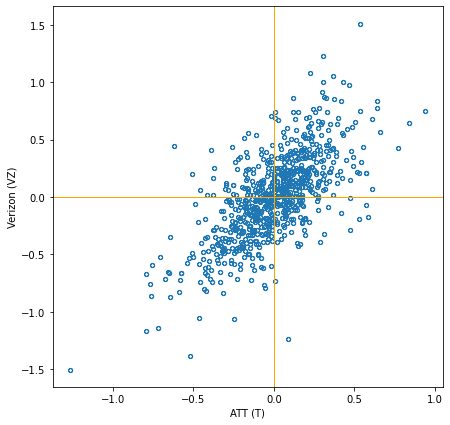

In [ ]:
ax = telecom.plot.scatter(x="T", y="VZ", figsize=(7, 7), marker="$\u25EF$")
ax.set_xlabel("ATT (T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color="orange", lw=1)
ax.axvline(0, color="orange", lw=1)

plt.show()

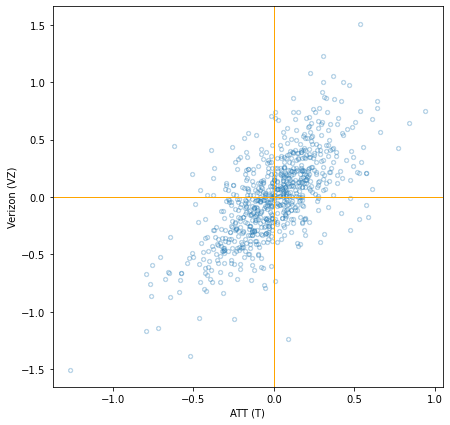

In [ ]:
ax = telecom.plot.scatter(x="T", y="VZ", figsize=(7, 7), marker="$\u25EF$", alpha=0.25)
ax.set_xlabel("ATT (T)")
ax.set_ylabel("Verizon (VZ)")
ax.axhline(0, color="orange", lw=1)
ax.axvline(0, color="orange", lw=1)

plt.show()

# Hex bins y contornos

In [4]:
URL5 = "https://raw.githubusercontent.com/lmcanavals/experiments/main/data/kc_tax.csv.gz"
kc_tax = pd.read_csv(URL5)
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) &
                     (kc_tax['SqFtTotLiving'] > 100) &
                     (kc_tax['SqFtTotLiving'] < 3500), :]
kc_tax0.shape

(432693, 3)

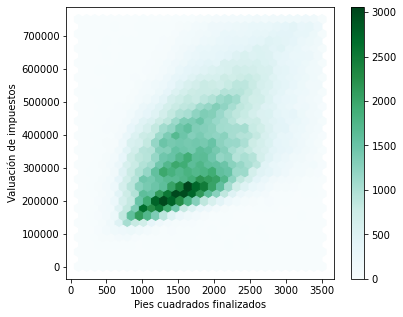

In [5]:
ax = kc_tax0.plot.hexbin(x="SqFtTotLiving", y="TaxAssessedValue", gridsize=30, sharex=False, figsize=(6, 5))
ax.set_xlabel("Pies cuadrados finalizados")
ax.set_ylabel("Valuación de impuestos")

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.kdeplot(data=kc_tax0, x="SqFtTotLiving", y="TaxAssessedValue", ax=ax)
ax.set_xlabel("Pies cuadrados finalizados")
ax.set_ylabel("Valuación de impuestos")

plt.show()

In [7]:
lc_loans = pd.read_csv("https://raw.githubusercontent.com/lmcanavals/experiments/main/data/lc_loans.csv")

In [8]:
crosstab = lc_loans.pivot_table(index="grade", columns="status", aggfunc=lambda x: len(x), margins=True)
print(crosstab)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [9]:
df = crosstab.copy().loc['A':'G', :]
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis=0)
df['All'] = df['All'] / sum(df['All'])
perc_crosstab = df
print(perc_crosstab)

status  Charged Off   Current  Fully Paid      Late       All
grade                                                        
A          0.021548  0.690454    0.281528  0.006470  0.160746
B          0.040054  0.709013    0.235401  0.015532  0.293529
C          0.049828  0.735702    0.191495  0.022974  0.268039
D          0.067410  0.717328    0.184189  0.031073  0.164708
E          0.081657  0.707936    0.170929  0.039478  0.077177
F          0.118258  0.654371    0.180409  0.046962  0.028614
G          0.126196  0.614008    0.198396  0.061401  0.007187


# Data Categórica numérica

In [10]:
airline_stats = pd.read_csv("https://raw.githubusercontent.com/lmcanavals/experiments/main/data/airline_stats.csv")
airline_stats.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


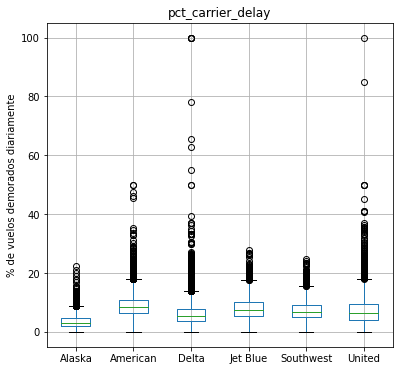

In [11]:
ax = airline_stats.boxplot(by='airline', column='pct_carrier_delay', figsize=(6, 6))
ax.set_xlabel('')
ax.set_ylabel("% de vuelos demorados diariamente")
plt.suptitle('')

plt.show()

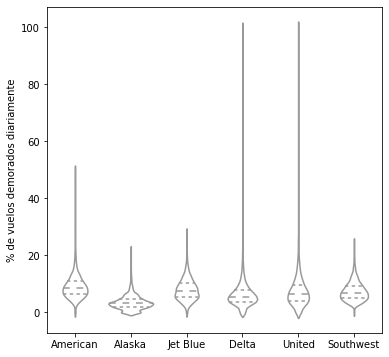

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
sns.violinplot(data=airline_stats, x='airline', y='pct_carrier_delay', ax=ax, inner='quartile', color='white')
ax.set_xlabel('')
ax.set_ylabel("% de vuelos demorados diariamente")
plt.suptitle('')

plt.show()